In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
import math as mth

In [2]:
class FuzzySet:
    def __init__(self):
        self.fuzzy_set = set()
        
    def __init__(self, *args):
        self.fuzzy_set = set()
        for item, grade in args:
            if grade >= 0  and grade <= 1:
                self.fuzzy_set.add((item, grade))
            else:
                raise TypeError('\'grade\' value is not in [0; 1].')
    
    def __repr__(self):
        return str(self.fuzzy_set)
    
    def add(self, item, grade):
        '''
        Adds a pair (item, grade) to f-set.
        '''
        if grade >= 0  and grade <= 1:
            self.fuzzy_set.add((item, grade))
        else:
            raise TypeError('\'grade\' value is not in [0; 1].')
    
    def get_height(self):
        '''
        Returns the max grade in the f-set.
        '''
        max_grade = 0
        for i in self.fuzzy_set:
            if i[1] > max_grade:
                max_grade = i[1]
        return max_grade
    
    def get_universum(self):
        '''
        Returns set which contains every item from f-set.
        '''
        universum = set()
        for i in self.fuzzy_set:
            universum.add(i[0])
        if universum:
            return universum
        return None

    def get_support(self):
        '''
        Returns set which contains items with grade > 0.
        '''
        support = set()
        for i in self.fuzzy_set:
            if i[1] > 0:
                support.add(i[0])
        if support:
            return support
        return None
    
    def get_points(self):
        '''
        Returns list if items which have grade == 0.5.
        '''
        points = list()
        for i in self.fuzzy_set:
            if i[1] == 0.5:
                points.append(i[0])
        if points:
            return points
        return None
    
    def get_modal(self):
        '''
        Returns True if there is only 1 item has grade == 1. 
        Else returns False.
        '''
        max_gr = self.get_height()
        if not max_gr < 1:
            count = 0
            for i in self.fuzzy_set:
                if i[1] == max_gr:
                    count = count + 1
            if count == 1:
                return True
        return False
    
    def get_normal_subnormal(self):
        '''
        Returns True if there are some elements which have grade == 1.
        Else returns False
        '''
        max_gr = self.get_height()
        if max_gr == 1:
            return True #is normal
        else:
            return False #is subnormal    
    
    def get_core(self):
        '''
        Returns set of item with grade == 1.
        '''
        max_gr = self.get_height()
        if not max_gr != 1:
            result = set()
            for i in self.fuzzy_set:
                if i[1] == max_gr:
                    result.add(i[0])
            return result
        return None
            
    def get_borders(self):
        '''
        Returns set of items with 0 < grade < 1.
        '''
        result = set()
        for i in self.fuzzy_set:
            if i[1] > 0 and i[1] < 1:
                result.add(i[0])
        if result:
            return result
        return None
    
    def get_normal_set(self):
        '''
        Returns normolized set.
        '''
        if not self.get_normal_subnormal():
            result = set()
            max_gr = self.get_height()
            for i in self.fuzzy_set:
                result.add((i[0], round(i[1]/max_gr, 2)))       
            return result
        return None
    
    def get_level_set(self, level):
        '''
        Returns set which is slice of items with grade >= level.
        '''
        result = set()
        for i in self.fuzzy_set:
            if i[1] >= level:
                result.add(i[0])
        if result:
            return result
        return None
    
    def get_dict(self):
        '''
        Returns dict like {item_1 : grade_1, item_2 : grade_2, ...}.
        '''
        result = {}
        for i in self.fuzzy_set:
            result[i[0]] = i[1]
        if result:
            return result
        return None
    
    def get_nearest_set(self):
        '''
        Returns nearest f-set (with same items but grades == 0 or 1 only).
        '''
        result = FuzzySet()
        items = self.get_universum()
        x_grades = self.get_dict()
        for i in items:
            result.add(i, x_grades[i] >= 0.5 and 1 or 0)
        return result
    
    def get_coordinates(self):
        '''
        Returns tuple like (list of items, list of their grades).
        '''
        items = list(self.get_universum())
        items.sort()
        
        grades = list()
        grades_dict = self.get_dict()
        for i in items:
            grades.append(grades_dict.get(i))
            
        return (items, grades)

In [3]:
#new stuff below
def fuzzy_conjuction(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.intersection(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result.add(i, min(x_grades[i],y_grades[i])) 
    return result

def fuzzy_disjunction(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.union(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
            result.add(i, max(x_grades.get(i,0),y_grades.get(i,0))) 
    return result

def fuzzy_not(f_set):
    result = FuzzySet()
    items = f_set.get_universum()
    grades = f_set.get_dict()
    for i in items:
        result.add(i,round(1 - grades.get(i,0),1))
    return result

def drastic_sum(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.union(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        if x_grades.get(i,0) != 0 and y_grades.get(i,0) != 0:
            result.add(i, 1)
        else:
            result.add(i, x_grades.get(i,0) + y_grades.get(i,0))
    return result

def border_disjunction(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.symmetric_difference(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result.add(i, min(x_grades.get(i,0) + y_grades.get(i,0), 1)) 
    return result

def algebraic_product(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.intersection(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result.add(i, round(x_grades[i] * y_grades[i], 3)) 
    return result

def algebraic_sum(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.union(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result.add(i, round(x_grades.get(i,0) + y_grades.get(i,0) 
                            - x_grades.get(i,0)*y_grades.get(i,0), 2)) 
    return result

def disjunction_sum(x,y):
    result = FuzzySet()
    items = x.get_universum()
    items = items.symmetric_difference(y.get_universum())
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result.add(i, round(max(min(x_grades.get(i,0), 1 - y_grades.get(i,0)),
                                min(y_grades.get(i,0), 1 - x_grades.get(i,0))), 2)) 
    return result

def complementation(x):
    result = FuzzySet()
    items = x.get_universum()
    x_grades = x.get_dict()
    for i in items:
        result.add(i, round(1 - x_grades[i], 2))
    return result

def CON(x):
    result = FuzzySet()
    items = x.get_universum()
    x_grades = x.get_dict()
    for i in items:
        result.add(i, round(x_grades[i] ** 2, 2))
    return result

def DIL(x):
    result = FuzzySet()
    items = x.get_universum()
    x_grades = x.get_dict()
    for i in items:
        result.add(i, round(mth.sqrt(x_grades[i]), 2))
    return result

In [4]:
#approx functions below    
def OLS_polynominal(x_list, y_list, k, h = 0.1):
    def make_coefficients():
        xs = []
        for i in range(k + 1):
            buffer = []
            if i == 0:
                for j in range(k + 1):
                    if j == 0:
                        buffer.append(n)
                    else:
                        buffer.append( sum(x_list[t] ** j for t in range(n)) )
            else:
                for j in range(k + 1):
                    buffer.append( sum(x_list[t] ** (j + i) for t in range(n)) )
            xs.append(buffer)
        return np.matrix(xs)
    def make_result_vector():
        ys = []
        for i in range(k + 1):
            ys.append( sum(y_list[t] * x_list[t] ** i for t in range(n)) )
        return ys
    
    n = len(x_list)
    b = np.linalg.lstsq(make_coefficients(), make_result_vector())[0]
    
    new_y_list = []
    new_x_list = np.arange(x_list[0] - h, x_list[n - 1] + h, h)
    for x in new_x_list:
        new_y_list.append( sum(b[i] * (x ** i) for i in range(len(b))) )
    return (new_x_list, new_y_list)

In [5]:
#indeces below
def linear_hamming_distance(x,y):
    result = 0.0
    items = x.get_universum()
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result += abs(x_grades.get(i,0) - y_grades.get(i,0))
    return result

def relative_hamming_distance(x,y):
    return round(linear_hamming_distance(x,y)/len(x.get_universum()), 3)

def fuzzy_hamming_index(x):
    return 2*relative_hamming_distance(x, x.get_nearest_set())

def linear_euclidean_distance(x,y):
    result = 0.0
    items = x.get_universum()
    x_grades = x.get_dict()
    y_grades = y.get_dict()
    for i in items:
        result += abs(x_grades[i] - y_grades[i]) ** 2
    result = mth.sqrt(result)
    return round(result,3)

def relative_euclidean_distance(x,y):
    return round(linear_euclidean_distance(x,y)/
                 mth.sqrt( len( x.get_universum() ) ), 3)

def fuzzy_euclidean_index(x):
    return 2 * relative_euclidean_distance(x, x.get_nearest_set() )

## Даны два множества
$$ X = \{\frac{0.9}{1} + \frac{0.6}{2} + \frac{0.4}{6} + \frac{0.3}{7} + \frac{0.4}{8}\} $$
$$ Y = \{\frac{0.5}{1} + \frac{0.4}{2} + \frac{0.2}{3} + \frac{1}{4} + \frac{0.8}{5} + \frac{0.6}{6} + \frac{0.3}{7} + \frac{0.1}{8}\} $$
# Задание 1.
### Представить нечеткие множества графически.

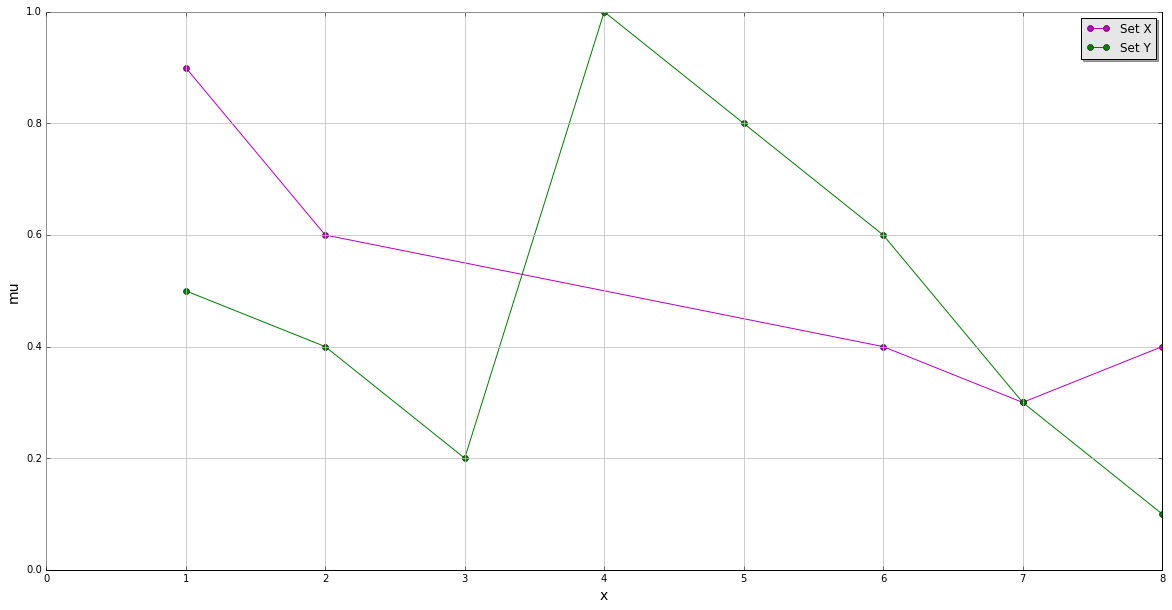

In [6]:
X = FuzzySet((1, 0.9),(2, 0.6),(6, 0.4),(7, 0.3),(8, 0.4))
Y = FuzzySet((1, 0.5),(2, 0.4),(3, 0.2),(4, 1),(5, 0.8),(6, 0.6),(7, 0.3),(8, 0.1))

fig, ax = plt.subplots(figsize=(20,10))

xs, ys = X.get_coordinates()

#xs = [1,2,6,7,8]
#ys = [0.9,0.6,0.4,0.3,0.4]
ax.plot(xs, ys, '-mo',label = 'Set X')

xs, ys = Y.get_coordinates()
#xs = [1,2,3,4,5,6,7,8]
#ys = [0.5,0.4,0.2,1,0.8,0.6,0.3,0.1]
ax.plot(xs, ys, '-go',label = 'Set Y')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

# Задание 2.
### Определить свойства этих множеств и дать характеристику (универсум, носитель, точки перехода, является ли функция пренадлежности унимодальной, явояеися ои нечеткое множество нормальным или субнормальным, высота, ядро, границы). Записать разложение нечеткого множества по множествам уровня.

In [7]:
print('Универсум множества Х:', X.get_universum())
print('Носитель множества X:', X.get_support())

result_string = 'Точки перехода множества X: '
result_list = X.get_points()
print(result_string, result_list)

if X.get_modal():
    print('Функция множества X унимодальна.')
else:
    print('Функция множества X не унимодальна.')
    
if X.get_normal_subnormal():
    print('Множество X нормально.')
else:
    print('Множество Х субнормально.')
    
result_string = 'Высота множества X: '
result = X.get_height()
print(result_string, result)

result_string = 'Ядро множества X:'
result_set = X.get_core()
if result_set is not None:
    print(result_string, result_set)
else:
    print(result_string, 'отсутствует.')
    
result_string = 'Границы множества X: '
result_set = X.get_borders()
print(result_string, result_set, '\n')


print('Универсум множества Y:', Y.get_universum())
print('Носитель множества Y:', Y.get_support())

result_string = 'Точки перехода множества Y: '
result_list = Y.get_points()
print(result_string, result_list)

if Y.get_modal():
    print('Функция множества Y унимодальна.')
else:
    print('Функция множества Y не унимодальна.')
    
if Y.get_normal_subnormal():
    print('Множество Y нормально.')
else:
    print('Множество Y субнормально.')
    
result_string = 'Высота множества Y: '
result = Y.get_height()
print(result_string, result)

result_string = 'Ядро множества Y:'
result_set = Y.get_core()
if result_set is not None:
    print(result_string, result_set)
else:
    print(result_string, 'отсутствует.')
    
result_string = 'Границы множества Y: '
result_set = Y.get_borders()
print(result_string, result_set, '\n\n')

for i in range(0, 10 + 1):
    print('Множества уровня %.1f:' % (i/10.))
    print('X:', X.get_level_set(i/10.))
    print('Y:', Y.get_level_set(i/10.))

Универсум множества Х: {8, 1, 2, 6, 7}
Носитель множества X: {8, 1, 2, 6, 7}
Точки перехода множества X:  None
Функция множества X не унимодальна.
Множество Х субнормально.
Высота множества X:  0.9
Ядро множества X: отсутствует.
Границы множества X:  {8, 1, 2, 6, 7} 

Универсум множества Y: {1, 2, 3, 4, 5, 6, 7, 8}
Носитель множества Y: {1, 2, 3, 4, 5, 6, 7, 8}
Точки перехода множества Y:  [1]
Функция множества Y унимодальна.
Множество Y нормально.
Высота множества Y:  1
Ядро множества Y: {4}
Границы множества Y:  {1, 2, 3, 5, 6, 7, 8} 


Множества уровня 0.0:
X: {8, 1, 2, 6, 7}
Y: {1, 2, 3, 4, 5, 6, 7, 8}
Множества уровня 0.1:
X: {8, 1, 2, 6, 7}
Y: {1, 2, 3, 4, 5, 6, 7, 8}
Множества уровня 0.2:
X: {8, 1, 2, 6, 7}
Y: {1, 2, 3, 4, 5, 6, 7}
Множества уровня 0.3:
X: {8, 1, 2, 6, 7}
Y: {1, 2, 4, 5, 6, 7}
Множества уровня 0.4:
X: {8, 1, 2, 6}
Y: {1, 2, 4, 5, 6}
Множества уровня 0.5:
X: {1, 2}
Y: {1, 4, 5, 6}
Множества уровня 0.6:
X: {1, 2}
Y: {4, 5, 6}
Множества уровня 0.7:
X: {1}
Y: {4, 5}

# Задание 3.
### Субнормальное нечеткое множество привести к нормальному.

In [8]:
print('Множество Х:')
result_set = X.get_normal_set()
if result_set:
    print(result_set)
else:
    print('Множество уже нормально.')
    
print('\nМножество Y:')
result_set = Y.get_normal_set()
if result_set:
    print(result_set)
else:
    print('Множество уже нормально.')

Множество Х:
{(6, 0.44), (2, 0.67), (8, 0.44), (7, 0.33), (1, 1.0)}

Множество Y:
Множество уже нормально.


# Задание 4.
### Найти множества: 
### $ X\cup{Y} $

In [9]:
print(fuzzy_disjunction(X,Y))

{(7, 0.3), (3, 0.2), (8, 0.4), (6, 0.6), (2, 0.6), (5, 0.8), (1, 0.9), (4, 1)}


### $X\cap{Y} $

In [10]:
print(fuzzy_conjuction(X,Y))

{(2, 0.4), (1, 0.5), (8, 0.1), (7, 0.3), (6, 0.4)}


$ \overline{\rm X\cup{Y}} $

In [11]:
print(fuzzy_not(fuzzy_disjunction(X,Y)))

{(7, 0.7), (3, 0.8), (8, 0.6), (6, 0.4), (2, 0.4), (5, 0.2), (1, 0.1), (4, 0)}


$ (X\cup{\overline{\rm Y}})\cap{(X\bigtriangledown{Y})} $

In [12]:
print(fuzzy_conjuction(fuzzy_disjunction(X, fuzzy_not(Y)), drastic_sum(X,Y)))

{(7, 0.7), (3, 0.2), (8, 0.9), (6, 0.4), (2, 0.6), (5, 0.2), (1, 0.9), (4, 0)}


$ (X\oplus{Y})\bullet(X + Y) $

In [13]:
print(algebraic_product(border_disjunction(X,Y), algebraic_sum(X,Y)))

{(3, 0.04), (4, 1), (5, 0.64)}


# Задание 5.
### Записать множества $ CON(X), DIL(X), CON(Y), DIL(Y) $, алгебраическое дополнение, дизъюнктивную сумму нечетких множеств $ X,Y $.

In [14]:
print('X:',X)
print('Y:',Y)

print('\nCON(X):',CON(X))
print('DIL(X):',DIL(X))

print('\nCON(Y):',CON(Y))
print('DIL(Y):',DIL(Y))

print('\nАлгебраическое дополнение Х:', complementation(X))
print('Алгебраическое дополнение Y:', complementation(Y))

print('\nДизъюнктивная сумма:', disjunction_sum(X,Y))

X: {(2, 0.6), (1, 0.9), (8, 0.4), (7, 0.3), (6, 0.4)}
Y: {(7, 0.3), (3, 0.2), (8, 0.1), (6, 0.6), (2, 0.4), (5, 0.8), (1, 0.5), (4, 1)}

CON(X): {(2, 0.36), (1, 0.81), (8, 0.16), (7, 0.09), (6, 0.16)}
DIL(X): {(2, 0.77), (1, 0.95), (8, 0.63), (7, 0.55), (6, 0.63)}

CON(Y): {(7, 0.09), (8, 0.01), (6, 0.36), (2, 0.16), (5, 0.64), (3, 0.04), (1, 0.25), (4, 1)}
DIL(Y): {(7, 0.55), (3, 0.45), (8, 0.32), (6, 0.77), (2, 0.63), (5, 0.89), (1, 0.71), (4, 1.0)}

Алгебраическое дополнение Х: {(2, 0.4), (1, 0.1), (8, 0.6), (7, 0.7), (6, 0.6)}
Алгебраическое дополнение Y: {(7, 0.7), (3, 0.8), (8, 0.9), (6, 0.4), (2, 0.6), (5, 0.2), (1, 0.5), (4, 0)}

Дизъюнктивная сумма: {(3, 0.2), (4, 1), (5, 0.8)}


# Задание 6.
### Нечеткие множества представить графически: первый график -- множества $ X, CON(X), DIL(X) $; второй -- $ Y, CON(Y), DIL(Y)$.

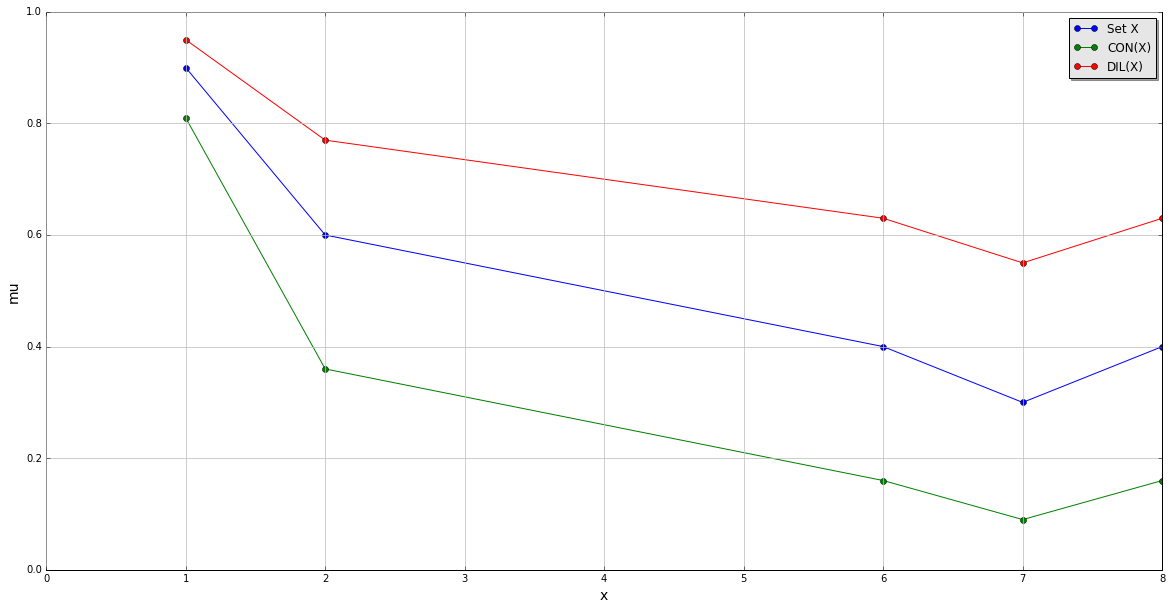

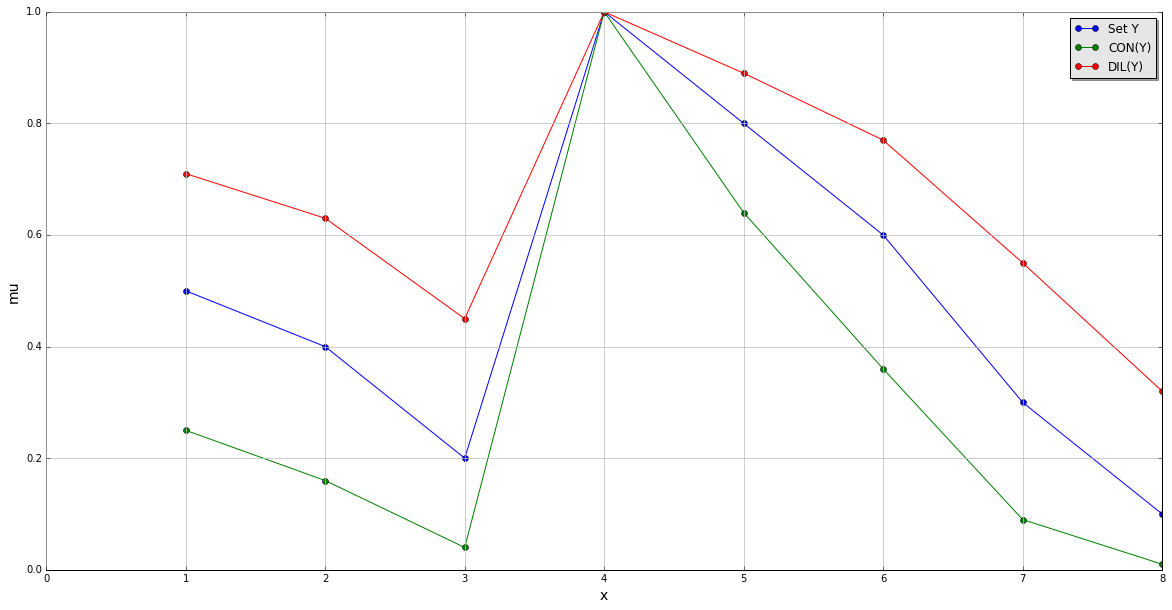

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = X.get_coordinates()

#xs = [1,2,6,7,8]
#ys = [0.9,0.6,0.4,0.3,0.4]
ax.plot(xs, ys, '-bo',label = 'Set X')

xs, ys = CON(X).get_coordinates()

#xs = [1,2,6,7,8]
#ys = [0.81,0.36,0.16,0.09,0.16]
ax.plot(xs, ys, '-go',label = 'CON(X)')

xs, ys = DIL(X).get_coordinates()

#xs = [1,2,6,7,8]
#ys = [0.95,0.77,0.63,0.55,0.63]
ax.plot(xs, ys, '-ro',label = 'DIL(X)')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

fig, ax = plt.subplots(figsize=(20,10))

xs, ys = Y.get_coordinates()

#xs = [1,2,3,4,5,6,7,8]
#ys = [0.5,0.4,0.2,1,0.8,0.6,0.3,0.1]
ax.plot(xs, ys, '-bo',label = 'Set Y')

xs, ys = CON(Y).get_coordinates()

#xs = [1,2,3,4,5,6,7,8]
#ys = [0.25,0.16,0.04,1,0.64,0.36,0.09,0.01]
ax.plot(xs, ys, '-go',label = 'CON(Y)')

xs, ys = DIL(Y).get_coordinates()

#xs = [1,2,3,4,5,6,7,8]
#ys = [0.71,0.63,0.45,1,0.89,0.77,0.55,0.32]
ax.plot(xs, ys, '-ro',label = 'DIL(Y)')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

# Задание 7.
### Для каждой из кривой задания 6 найти подходящую функцию принадлежности аналитически.

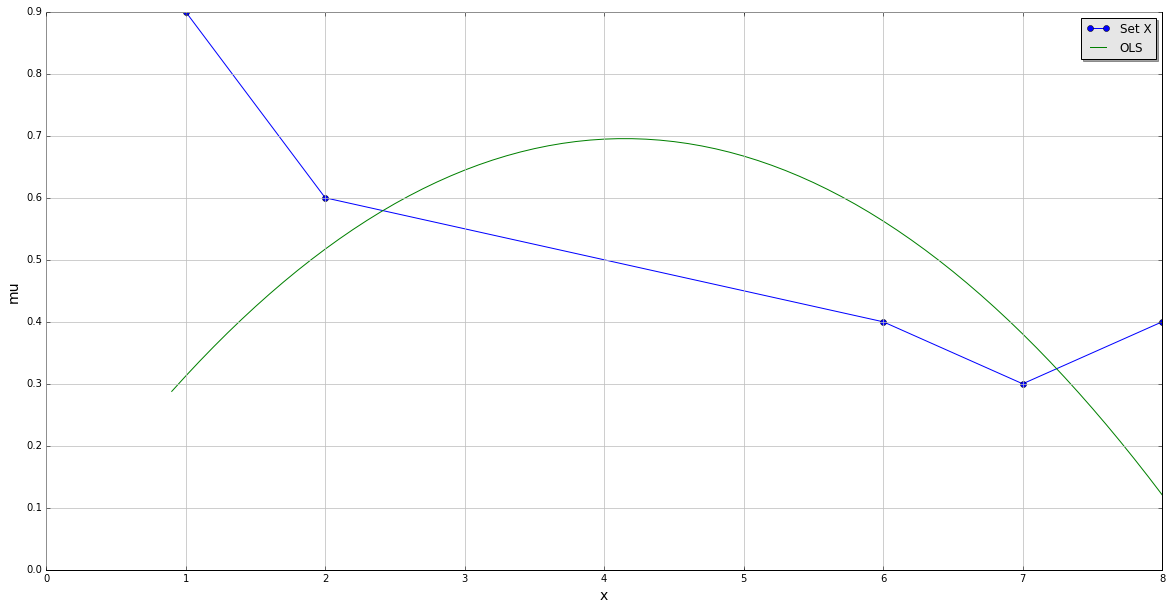

In [16]:
fig, ax = plt.subplots(figsize = (20, 10))

xs, ys = X.get_coordinates()

ax.plot(xs, ys, '-bo',label = 'Set X')

x, y = Y.get_coordinates()
xs, ys = OLS_polynominal(x, y, 2)
ax.plot(xs, ys, '-g', label = 'OLS')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

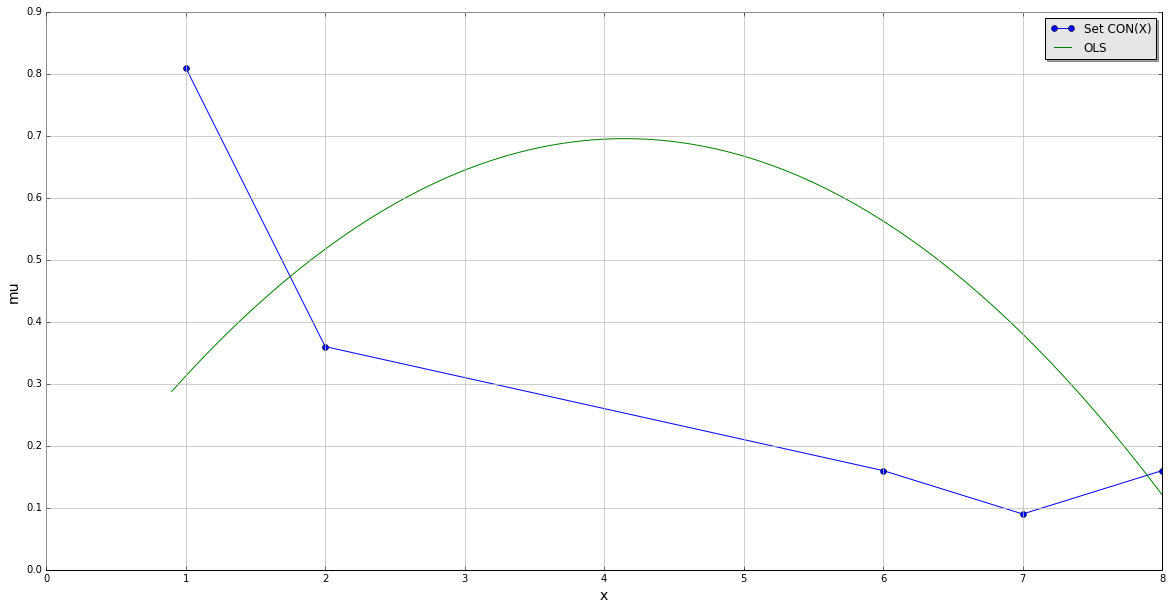

In [17]:
fig, ax = plt.subplots(figsize = (20, 10))

xs, ys = CON(X).get_coordinates()

ax.plot(xs, ys, '-bo',label = 'Set CON(X)')

x, y = Y.get_coordinates()
xs, ys = OLS_polynominal(x, y, 2)
ax.plot(xs, ys, '-g', label = 'OLS')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

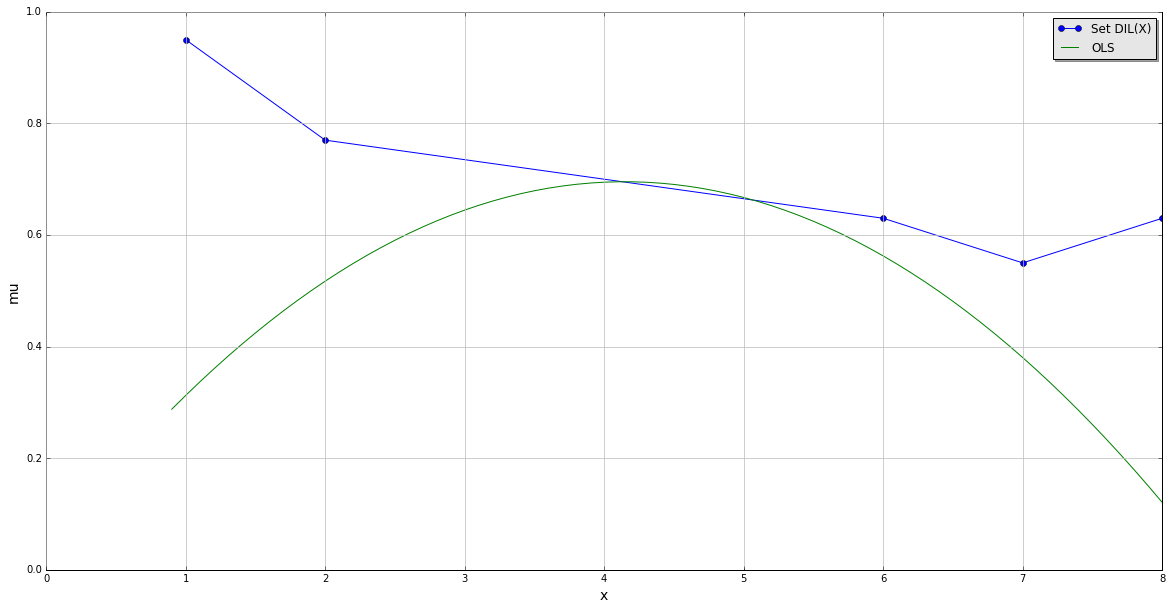

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))

xs, ys = DIL(X).get_coordinates()

ax.plot(xs, ys, '-bo',label = 'Set DIL(X)')

x, y = Y.get_coordinates()
xs, ys = OLS_polynominal(x, y, 2)
ax.plot(xs, ys, '-g', label = 'OLS')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

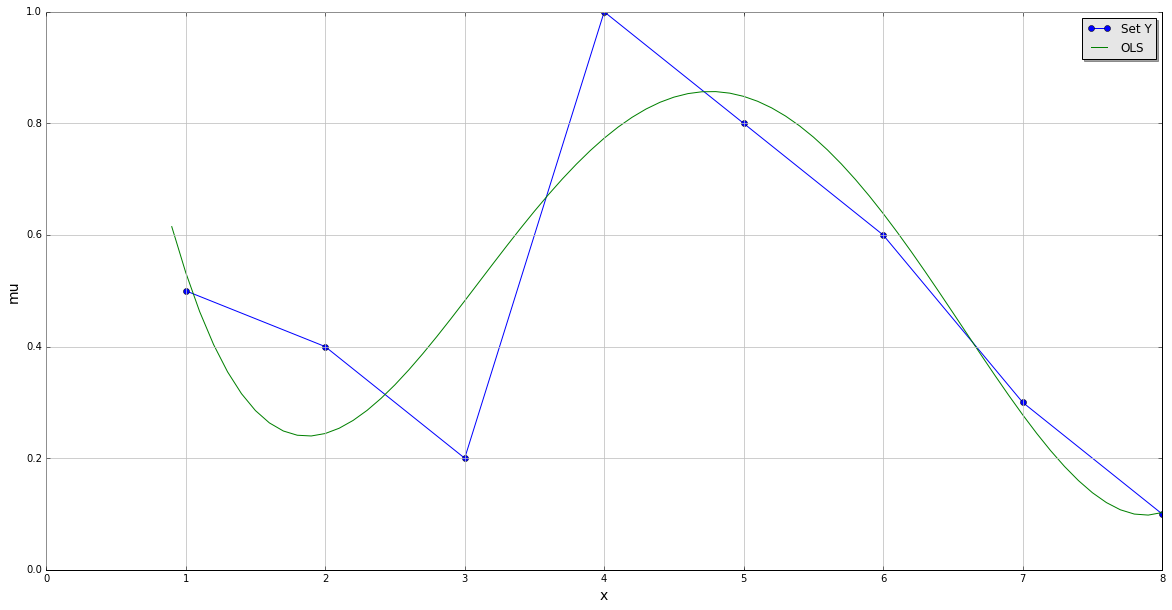

In [19]:
fig, ax = plt.subplots(figsize = (20, 10))

xs, ys = Y.get_coordinates()

ax.plot(xs, ys, '-bo',label = 'Set Y')

x, y = Y.get_coordinates()
xs, ys = OLS_polynominal(x, y, 4)
ax.plot(xs, ys, '-g', label = 'OLS')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

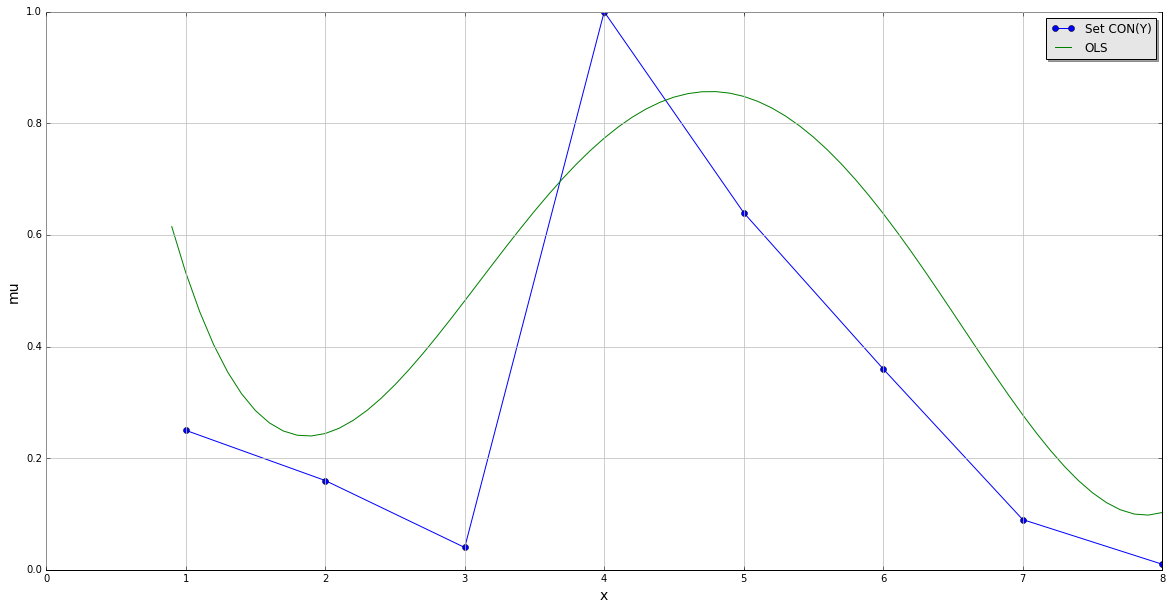

In [20]:
fig, ax = plt.subplots(figsize = (20, 10))

xs, ys = CON(Y).get_coordinates()

ax.plot(xs, ys, '-bo',label = 'Set CON(Y)')

x, y = Y.get_coordinates()
xs, ys = OLS_polynominal(x, y, 4)
ax.plot(xs, ys, '-g', label = 'OLS')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

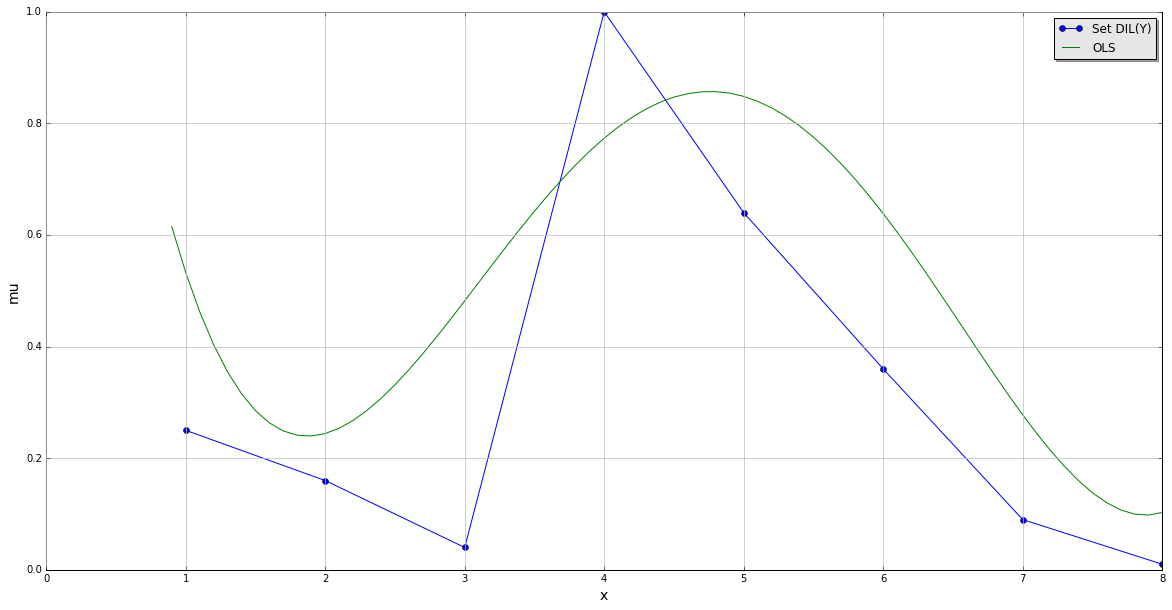

In [21]:
fig, ax = plt.subplots(figsize = (20, 10))

xs, ys = CON(Y).get_coordinates()

ax.plot(xs, ys, '-bo',label = 'Set DIL(Y)')

x, y = Y.get_coordinates()
xs, ys = OLS_polynominal(x, y, 4)
ax.plot(xs, ys, '-g', label = 'OLS')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

# Задание 8.
### Вычислить индексы нечеткости по метрике Хэмминга для всех 6 множеств.

In [22]:
print('X:',X)
n_set = X.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Хэмминга:',linear_hamming_distance(X,n_set))
print('Относительное расстояние Хэмминга:',relative_hamming_distance(X,n_set))
x_hi = fuzzy_hamming_index(X)
print('Индекс нечеткости множества:', x_hi)

con_x = CON(X)
print('\nCON(X):',con_x)
n_set = con_x.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Хэмминга:',linear_hamming_distance(con_x,n_set))
print('Относительное расстояние Хэмминга:',relative_hamming_distance(con_x,n_set))
con_x_hi = fuzzy_hamming_index(con_x)
print('Индекс нечеткости множества:', con_x_hi)

dil_x = DIL(X)
print('\nDIL(X):',dil_x)
n_set = dil_x.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Хэмминга:',linear_hamming_distance(dil_x,n_set))
print('Относительное расстояние Хэмминга:',relative_hamming_distance(dil_x,n_set))
dil_x_hi = fuzzy_hamming_index(dil_x)
print('Индекс нечеткости множества:', dil_x_hi)

print('\n\nY:',Y)
n_set = Y.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Хэмминга:',linear_hamming_distance(Y,n_set))
print('Относительное расстояние Хэмминга:',relative_hamming_distance(Y,n_set))
y_hi = fuzzy_hamming_index(Y)
print('Индекс нечеткости множества:', y_hi)

con_y = CON(Y)
print('\nCON(Y):',con_y)
n_set = con_y.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Хэмминга:',linear_hamming_distance(con_y,n_set))
print('Относительное расстояние Хэмминга:',relative_hamming_distance(con_y,n_set))
con_y_hi = fuzzy_hamming_index(con_y)
print('Индекс нечеткости множества:', con_y_hi)

dil_y = DIL(Y)
print('\nDIL(Y):',dil_y)
n_set = dil_y.get_nearest_set()
print('Ближайшее множество:', n_set)
print('Линейное расстояние Хэмминга:',linear_hamming_distance(dil_y,n_set))
print('Относительное расстояние Хэмминга:',relative_hamming_distance(dil_y, n_set))
dil_y_hi = fuzzy_hamming_index(dil_y)
print('Индекс нечеткости множества:', dil_y_hi)

X: {(2, 0.6), (1, 0.9), (8, 0.4), (7, 0.3), (6, 0.4)}
Ближайшее множество: {(7, 0), (8, 0), (6, 0), (1, 1), (2, 1)}
Линейное расстояние Хэмминга: 1.6
Относительное расстояние Хэмминга: 0.32
Индекс нечеткости множества: 0.64

CON(X): {(2, 0.36), (1, 0.81), (8, 0.16), (7, 0.09), (6, 0.16)}
Ближайшее множество: {(7, 0), (2, 0), (8, 0), (6, 0), (1, 1)}
Линейное расстояние Хэмминга: 0.96
Относительное расстояние Хэмминга: 0.192
Индекс нечеткости множества: 0.384

DIL(X): {(2, 0.77), (1, 0.95), (8, 0.63), (7, 0.55), (6, 0.63)}
Ближайшее множество: {(8, 1), (6, 1), (1, 1), (2, 1), (7, 1)}
Линейное расстояние Хэмминга: 1.47
Относительное расстояние Хэмминга: 0.294
Индекс нечеткости множества: 0.588


Y: {(7, 0.3), (3, 0.2), (8, 0.1), (6, 0.6), (2, 0.4), (5, 0.8), (1, 0.5), (4, 1)}
Ближайшее множество: {(7, 0), (3, 0), (6, 1), (8, 0), (2, 0), (5, 1), (4, 1), (1, 1)}
Линейное расстояние Хэмминга: 2.1
Относительное расстояние Хэмминга: 0.263
Индекс нечеткости множества: 0.526

CON(Y): {(7, 0.09),

# Задание 9.
### Вычислить индекс нечеткости по метрики Евклида для всех 6 множеств.

In [23]:
print('X:',X)
n_set = X.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Евклида:',linear_euclidean_distance(X,n_set))
print('Относительное расстояние Евклида:',relative_euclidean_distance(X,n_set))
x_ei = fuzzy_euclidean_index(X)
print('Индекс нечеткости множества:', x_ei)

con_x = CON(X)
print('\nCON(X):',con_x)
n_set = con_x.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Евклида:',linear_euclidean_distance(con_x,n_set))
print('Относительное расстояние Евклида:',relative_euclidean_distance(con_x,n_set))
con_x_ei = fuzzy_euclidean_index(con_x)
print('Индекс нечеткости множества:', con_x_ei)

dil_x = DIL(X)
print('\nDIL(X):',dil_x)
n_set = dil_x.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Евклида:',linear_euclidean_distance(dil_x,n_set))
print('Относительное расстояние Евклида:',relative_euclidean_distance(dil_x,n_set))
dil_x_ei = fuzzy_euclidean_index(dil_y)
print('Индекс нечеткости множества:', dil_x_ei)

print('\n\nY:',Y)
n_set = Y.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Евклида:',linear_euclidean_distance(Y,n_set))
print('Относительное расстояние Евклида:',relative_euclidean_distance(Y,n_set))
y_ei = fuzzy_euclidean_index(Y)
print('Индекс нечеткости множества:', y_ei)

con_y = CON(Y)
print('\nCON(Y):',con_y)
n_set = con_y.get_nearest_set()
print('Ближайшее множество:',n_set)
print('Линейное расстояние Евклида:',linear_euclidean_distance(con_y,n_set))
print('Относительное расстояние Евклида:',relative_euclidean_distance(con_y,n_set))
con_y_ei = fuzzy_euclidean_index(con_y)
print('Индекс нечеткости множества:', con_y_ei)

dil_y = DIL(Y)
print('\nDIL(Y):',dil_y)
n_set = dil_y.get_nearest_set()
print('Ближайшее множество:',)
print('Линейное расстояние Евклида:',linear_euclidean_distance(dil_y,n_set))
print('Относительное расстояние Евклида:',relative_euclidean_distance(dil_y, n_set))
dil_y_ei = fuzzy_euclidean_index(dil_y)
print('Индекс нечеткости множества:', dil_y_ei)

X: {(2, 0.6), (1, 0.9), (8, 0.4), (7, 0.3), (6, 0.4)}
Ближайшее множество: {(7, 0), (8, 0), (6, 0), (1, 1), (2, 1)}
Линейное расстояние Евклида: 0.762
Относительное расстояние Евклида: 0.341
Индекс нечеткости множества: 0.682

CON(X): {(2, 0.36), (1, 0.81), (8, 0.16), (7, 0.09), (6, 0.16)}
Ближайшее множество: {(7, 0), (2, 0), (8, 0), (6, 0), (1, 1)}
Линейное расстояние Евклида: 0.474
Относительное расстояние Евклида: 0.212
Индекс нечеткости множества: 0.424

DIL(X): {(2, 0.77), (1, 0.95), (8, 0.63), (7, 0.55), (6, 0.63)}
Ближайшее множество: {(8, 1), (6, 1), (1, 1), (2, 1), (7, 1)}
Линейное расстояние Евклида: 0.729
Относительное расстояние Евклида: 0.326
Индекс нечеткости множества: 0.63


Y: {(7, 0.3), (3, 0.2), (8, 0.1), (6, 0.6), (2, 0.4), (5, 0.8), (1, 0.5), (4, 1)}
Ближайшее множество: {(7, 0), (3, 0), (6, 1), (8, 0), (2, 0), (5, 1), (4, 1), (1, 1)}
Линейное расстояние Евклида: 0.866
Относительное расстояние Евклида: 0.306
Индекс нечеткости множества: 0.612

CON(Y): {(7, 0.09), 

# Задание 10.
### Сравнить степень нечеткости $ X $ с $ CON(X) $ и $ DIL(X) $, а также множества $ Y $ с множествами $ CON(Y) $ и $ DIL(Y) $.

In [24]:
print('По индексам Хэмминга:')
buffer_dict = {x_hi : 'X', con_x_hi : 'CON(X)', dil_x_hi : 'DIL(X)'}
buffer_list = [x_hi, con_x_hi, dil_x_hi]
buffer_list.sort()
while buffer_list != list():
    i = buffer_list.pop()
    print(buffer_dict[i],':',i)
    
print('\n')
    
buffer_dict = {y_hi : 'Y', con_y_hi : 'CON(Y)', dil_y_hi : 'DIL(Y)'}
buffer_list = [y_hi, con_y_hi, dil_y_hi]
buffer_list.sort()
while buffer_list != list():
    i = buffer_list.pop()
    print(buffer_dict[i],':',i)
    
print('\n\n')

print('По индексам Евклида:')
buffer_dict = {x_ei : 'X', con_x_ei : 'CON(X)', dil_x_ei : 'DIL(X)'}
buffer_list = [x_ei, con_x_ei, dil_x_ei]
buffer_list.sort()
while buffer_list != list():
    i = buffer_list.pop()
    print(buffer_dict[i],':',i)
    
print('\n')

buffer_dict = {y_ei : 'Y', con_y_ei : 'CON(Y)', dil_y_ei : 'DIL(Y)'}
buffer_list = [y_ei, con_y_ei, dil_y_ei]
buffer_list.sort()
while buffer_list != list():
    i = buffer_list.pop()
    print(buffer_dict[i],':',i)

По индексам Хэмминга:
X : 0.64
DIL(X) : 0.588
CON(X) : 0.384


DIL(Y) : 0.556
Y : 0.526
CON(Y) : 0.318



По индексам Евклида:
X : 0.682
DIL(X) : 0.63
CON(X) : 0.424


DIL(Y) : 0.63
Y : 0.612
CON(Y) : 0.422
